In [29]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import tqdm
import numpy as np
import matplotlib.pylab as plt

In [9]:
fmnist_transforms = transforms.Compose([transforms.ToTensor(), lambda x:x.flatten()])
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=fmnist_transforms)
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
validationset = datasets.FashionMNIST('./data', download=True, train=False, transform=fmnist_transforms)
val_loader = DataLoader(validationset, batch_size=64, shuffle=True)

In [21]:
model = nn.Sequential(nn.Linear(784, 200), nn.ReLU(), nn.Linear(200, 10))
optim = torch.optim.Adam(model.parameters())
crit = nn.CrossEntropyLoss()
for e in range(10):
    tq = tqdm.tqdm_notebook(train_loader)
    for x,y in tq:
        optim.zero_grad()
        out = model(x)
        loss = crit(out, y)
        loss.backward()
        optim.step()
    total = 0
    correct = 0
    for x,y in val_loader:
        correct+=torch.eq(model(x).argmax(1), y).sum()
        total+=x.shape[0]
    print (f'{e}: {correct/total}')

/tmp/ipykernel_153758/271297144.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tq = tqdm.tqdm_notebook(train_loader)


  0%|          | 0/938 [00:00<?, ?it/s]

0: 0.8489999771118164


  0%|          | 0/938 [00:00<?, ?it/s]

1: 0.8598999977111816


  0%|          | 0/938 [00:00<?, ?it/s]

2: 0.8683000206947327


  0%|          | 0/938 [00:00<?, ?it/s]

3: 0.8776000142097473


  0%|          | 0/938 [00:00<?, ?it/s]

4: 0.8766000270843506


  0%|          | 0/938 [00:00<?, ?it/s]

5: 0.8709999918937683


  0%|          | 0/938 [00:00<?, ?it/s]

6: 0.8809999823570251


  0%|          | 0/938 [00:00<?, ?it/s]

7: 0.8833000063896179


  0%|          | 0/938 [00:00<?, ?it/s]

8: 0.8733999729156494


  0%|          | 0/938 [00:00<?, ?it/s]

9: 0.8834999799728394


In [36]:
matr = np.zeros((10, 10))
totals = np.zeros(10)
for x,y in val_loader:
        out = model(x).argmax(1)
        for o_i, y_i in zip(out, y):
            matr[y_i.item(), o_i.item()] += 1
            totals[y_i.item()] += 1

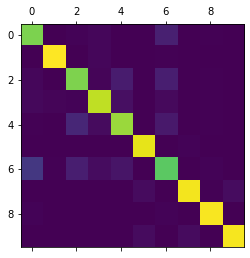

In [34]:
plt.matshow(matr)


In [35]:
matr.diagonal()/totals

array([0.785, 0.978, 0.789, 0.886, 0.831, 0.941, 0.73 , 0.962, 0.968,
       0.965])

In [ ]:
# аутсайдер - 6 класс

In [37]:
matr[6] # часто путается с 2

array([ 86.,   4.,  81.,  26.,  65.,   0., 730.,   0.,   8.,   0.])